In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc 

### Time Series

pd.date_range("시작일", "마직막일")  
시작일부터 마지막날짜까지 데이터화 함

In [2]:
dates = pd.date_range("2016-05-01", "2016-05-07")
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
tmp1 = pd.Series([80, 92, 82, 97, 84, 78, 98], index = dates, name = "수학")
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    97
2016-05-05    84
2016-05-06    78
2016-05-07    98
Freq: D, Name: 수학, dtype: int64

In [4]:
tmp2 = pd.Series(np.random.randint(0, 100, 7), index = dates, name="철학")
# tmp2 = np.random.randint(0, 100, 7)
tmp2

2016-05-01    75
2016-05-02    38
2016-05-03     5
2016-05-04    72
2016-05-05    84
2016-05-06    42
2016-05-07    60
Freq: D, Name: 철학, dtype: int32

In [18]:
ex = pd.concat([tmp1, tmp2], axis=1)
ex

#2016년 5월 5일 점수
ex.loc["2016-05-05"]

#5/4, 5/6, 5/7의 철학점수만
ex.loc["2016-05-04" : "2016-05-07"]["철학"]
# ex.loc["2016-05-04" : ]["철학"]
# ex["철학"][3:7]



2016-05-04    72
2016-05-05    84
2016-05-06    42
2016-05-07    60
Freq: D, Name: 철학, dtype: int32

In [21]:
#drop으로 원하는 데이터만 남기기
#t = ex는 ex도 바뀜
t = ex.copy()
t.drop(columns="수학", index=t.index[0:3], inplace=True)
t

# 수학점수와 철학점수 차 구해서 열 추가하기
ex["점수 차"] = ex.수학 - ex.철학
ex


,수학,철학,점수 차
2016-05-01,80,75,5
2016-05-02,92,38,54
2016-05-03,82,5,77
2016-05-04,97,72,25
2016-05-05,84,84,0
2016-05-06,78,42,36
2016-05-07,98,60,38


In [24]:
#컬럼이름 바꾸기
ex.rename(inplace=True 
          , columns={"수학" : "Math", "철학" : "philosopy", "점수 차":"diff"}
          )
ex.drop(columns="diff", inplace=True)
ex

,Math,philosopy
2016-05-01,80,75
2016-05-02,92,38
2016-05-03,82,5
2016-05-04,97,72
2016-05-05,84,84
2016-05-06,78,42
2016-05-07,98,60


In [29]:
# and,or 중 하나 사용해서
# 5-3, 5-4의 시험점수를 DF형태로 가져오기

ex.iloc[2:4]
ex[(ex.index == "2016-05-03") | (ex.index == "2016-05-04")]

,Math,philosopy
2016-05-03,82,5
2016-05-04,97,72


In [34]:
#수학점수가 85이상이 5-1~5-5사이

#point : 날짜도 부등호로 사용가능

ex[(ex.Math >= 85) & ((ex.index >= "2016-05-01") & (ex.index <= "2016-05-05"))]

,Math,philosopy
2016-05-02,92,38
2016-05-04,97,72


Text(0, 0.5, 'score')

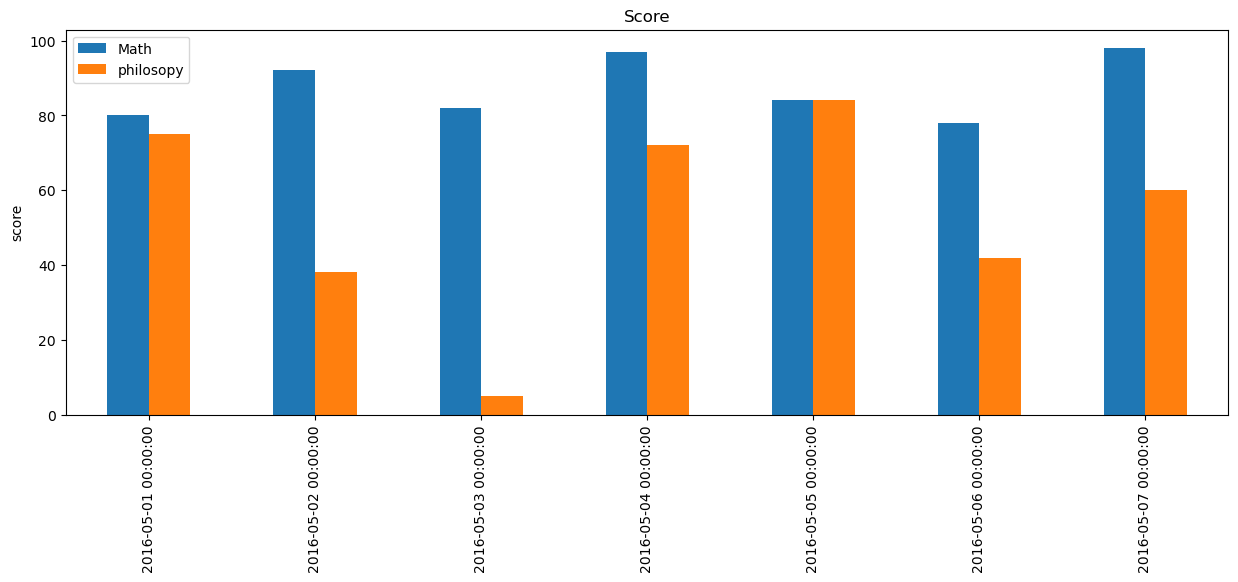

In [48]:
%matplotlib inline
#소리나, 영상, 이미지를 선명하게 가져옴

# ex.plot()
ex.plot(kind = "bar"
        , figsize = (15,5)
        , title = "Score"
        )
# plt.xlabel("date")
plt.ylabel("score")

In [55]:
#IMOB영화리뷰 데이터셋을 인터넷에서 불러오기
movie = pd.read_csv("http://bit.ly/imdbratings"
                    , encoding = "EUC-KR"
                    , index_col = "title"
                    )
movie.head(5)
# movie.shape

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Lord of the Rings: The Return of the King,8.9,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Seven Samurai,8.7,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
Once Upon a Time in America,8.4,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
Lawrence of Arabia,8.4,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
Lagaan: Once Upon a Time in India,8.3,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
Gone with the Wind,8.2,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
Ben-Hur,8.1,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
The Ten Commandments,7.9,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


In [64]:
booleans = []
for length in movie.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)
up_200 = movie[booleans]        
movie[booleans] == movie[movie.duration >= 200]
# movie[booleans] 

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Godfather: Part II,True,True,True,True,True
The Lord of the Rings: The Return of the King,True,True,True,True,True
Seven Samurai,True,True,True,True,True
Once Upon a Time in America,True,True,True,True,True
Lawrence of Arabia,True,True,True,True,True
Lagaan: Once Upon a Time in India,True,True,True,True,True
Gone with the Wind,True,True,True,True,True
Ben-Hur,True,True,True,True,True
The Ten Commandments,True,True,True,True,True


In [83]:
# 이번 장르가 Crime또는 Drama 또는 Action인 영화리스트
# condition = ((movie.genre))
condition = movie.genre.isin(["Crime", "Drama", "Action"])
movie[condition]

# condition2 = movie.genre.str.contains(["Crime", "Drama", "Action"])
# condition2 = movie.genre.str.contains("Crime", "Drama", "Action")
# condition2
# movie[condition2]
movie.genre


pandas.core.series.Series

### 나라별 음주현황

In [97]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry'
                     , index_col = "country")
drinks.head()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


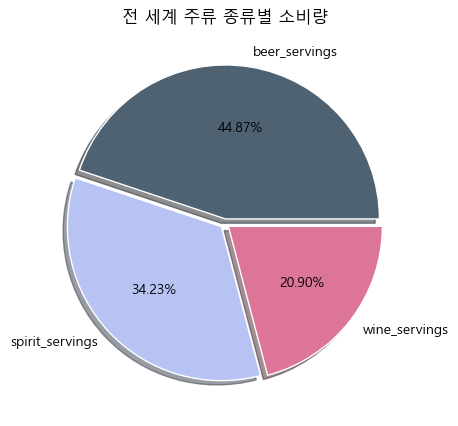

In [149]:
new = pd.Series([drinks.beer_servings.sum(), drinks.spirit_servings.sum(),drinks.wine_servings.sum()]
                , index = ["beer_servings", "spirit_servings", "wine_servings"]
                , name = "전 세계 알콜별 소비량"
                )

# =================================== 그래프 그리기====================================
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

explode = [0.03, 0.03, 0.03]
colors = ['#4F6272', '#B7C3F3', '#DD7596']

plt.figure(figsize = (5,5)).patch.set_facecolor("w")
plt.pie(
        #넣고 싶은 데이터
            new  
        #레이블 설정
            , labels = ["beer_servings", "spirit_servings", "wine_servings"] #각 그래프에 파이부분
            , labeldistance=1.1  #레이블이 그래프레어 얼마나 멀리 위치하냐(기본은 1.1정도)
            , counterclock=True #counterclock = False는 반시계방향
        #그래프 안에 내용 설정
            , autopct="%1.2f%%"  #소수점 1번째까지 실수로 표현해줘
            , colors=colors #그래프안 색 변경
        #그래프 설정
            , explode=explode #중심에서 벗어나기
            , wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }
            , shadow = True #음영넣기
        ) 

plt.title("전 세계 주류 종류별 소비량")

plt.show()

In [200]:
test_sum = drinks.reset_index().set_index("continent").iloc[:, 1:2].groupby("continent").sum()
test_mean = drinks.reset_index().set_index("continent").iloc[:, 1:2].groupby("continent").mean()
test_max = drinks.reset_index().set_index("continent").iloc[:, 1:2].groupby("continent").max()

#=======================================================================

beer_agg = drinks.groupby("continent").beer_servings.agg(["count", "mean", "min", "max"])
wine_agg = drinks.groupby("continent").wine_servings.agg(["count", "mean", "min", "max"])
spirit_agg = drinks.groupby("continent").spirit_servings.agg(["count", "mean", "min", "max"])

spirit_agg[]

,count,mean,min,max
continent,,,,
Africa,53,16.339623,0,152
Asia,44,60.840909,0,326
Europe,45,132.555556,0,373
North America,23,165.739130,68,438
Oceania,16,58.437500,0,254
South America,12,114.750000,25,302


In [ ]:
plt.plot.barh(test.index, test.values)
plt.xticks(np.arange(0,7000, 500))